# HumanActivityRecognition

Aim is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

Dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. Data is recorded from accelerometer and gyroscope readings taken by the smartphone.
Will try to build ML and DL models and compare their performance.

### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


### Train Data

In [2]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

C:\Users\Dipayan\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
6697,0.278205,-0.017599,-0.107556,-0.992729,-0.991597,-0.996268,-0.992906,-0.991069,-0.996829,-0.940759,...,0.048445,-0.341787,0.650851,0.870922,0.556669,-0.521717,-0.483661,29,6,LAYING


### Test Data

In [3]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

C:\Users\Dipayan\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1250,0.275223,-0.012438,-0.088021,-0.980592,-0.969782,-0.952062,-0.985619,-0.972299,-0.94918,-0.915993,...,0.019601,0.246893,0.343039,-0.281501,-0.953118,0.094078,-0.017852,12,4,SITTING


## Data Cleaning

#### 1.Check For Duplicates

In [4]:
print('Number of duplicates in train data: {}'.format(sum(train.duplicated())))
print('Number of duplicates in test data: {}'.format(sum(test.duplicated())))

Number of duplicates in train data: 0
Number of duplicates in test data: 0


#### 2.Check for Null Values

In [5]:
print('{} NaN/Null values in train'.format(train.isnull().values.sum()))
print('{} NaN/Null values in test'.format(test.isnull().values.sum()))

0 NaN/Null values in train
0 NaN/Null values in test


##  Check for data imbalance

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

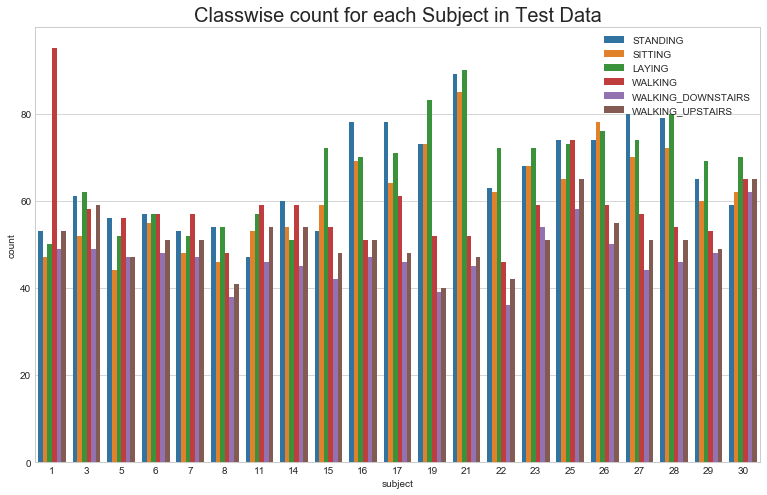

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(13,8))
plt.title('Classwise count for each Subject in Test Data',fontsize=20)
sns.countplot(x='subject',hue='ActivityName',data=train)
plt.legend(loc='upper right')
plt.show()

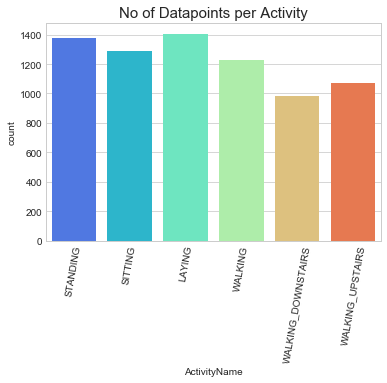

In [16]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

### Observation
> Our data is well balanced

In [17]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

Feature Names Contain a lot of special charecters. Let us replace some of them

### Changing Feature Names

In [18]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

### Save the Train and Test File

In [19]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

### Static and Dynamic Activity
>All the 6 activities can be broadly classified in two categories
- Static Activity- Sit,Lie Down,Stand
- Dynamic Activity- Walking,Walking Upstairs,Walking Downstairs

Let us check the distribution of static and dynamic activities w.r.t tBodyAccMean

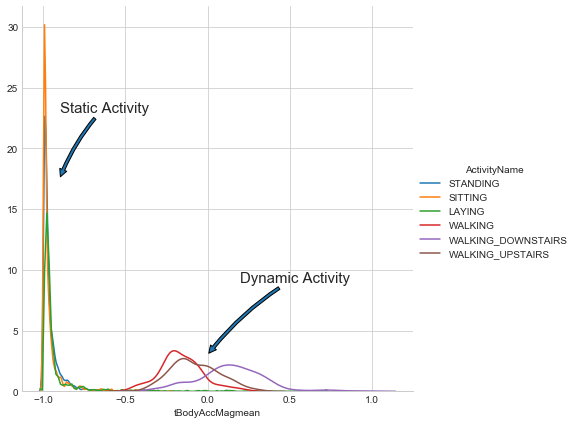

In [26]:
sns.FacetGrid(data=train,hue='ActivityName',size=6)\
   .map(sns.distplot,'tBodyAccMagmean',hist=False)\
   .add_legend()
plt.annotate('Static Activity',xy=(-0.9,17.5),xytext=(-0.9,23),arrowprops=dict(arrowstyle='simple',connectionstyle='arc3,rad=0.1'),ha='left',size=15)
plt.annotate('Dynamic Activity',xy=(0,3),xytext=(0.2,9),arrowprops=dict(arrowstyle='simple',connectionstyle='arc3,rad=0.1'),ha='left',size=15)

plt.show()

>Static And Dynamic Activity can be distinguished easily

#### Apply t-SNE to visualize all the class points together

In [27]:
from sklearn.manifold import TSNE

In [28]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.313s...
[t-SNE] Computed neighbors for 7352 samples in 43.196s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.062s
[t-SNE] Iteration 50: error = 124.7046432, gradient norm = 0.0283068 (50 iterations in 12.287s)
[t-SNE] Iteration 100: error = 107.2340546, gradient norm = 0.0280149 (50 iterations i

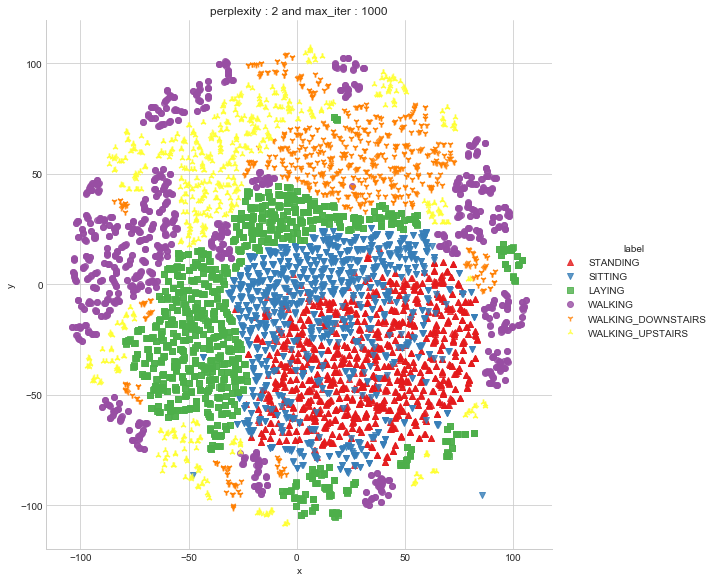

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.296s...
[t-SNE] Computed neighbors for 7352 samples in 49.139s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.073s
[t-SNE] Iteration 50: error = 113.9233932, gradient norm = 0.0232380 (50 iterations in 27.303s)
[t-SNE] Iteration 100: error = 97.3307800, gradient norm = 0.0148487 (50 iterati

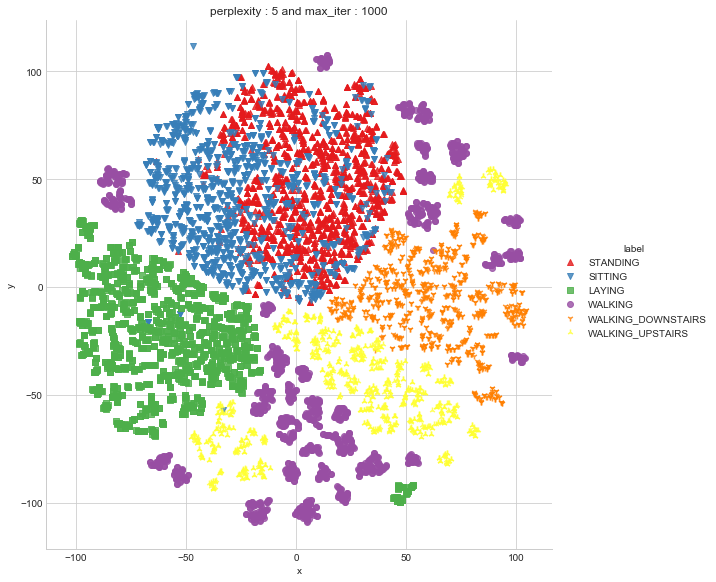

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.424s...
[t-SNE] Computed neighbors for 7352 samples in 46.574s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.366s
[t-SNE] Iteration 50: error = 105.9385071, gradient norm = 0.0161862 (50 iterations in 15.703s)
[t-SNE] Iteration 100: error = 90.6338043, gradient norm = 0.0106831 (50 iterat

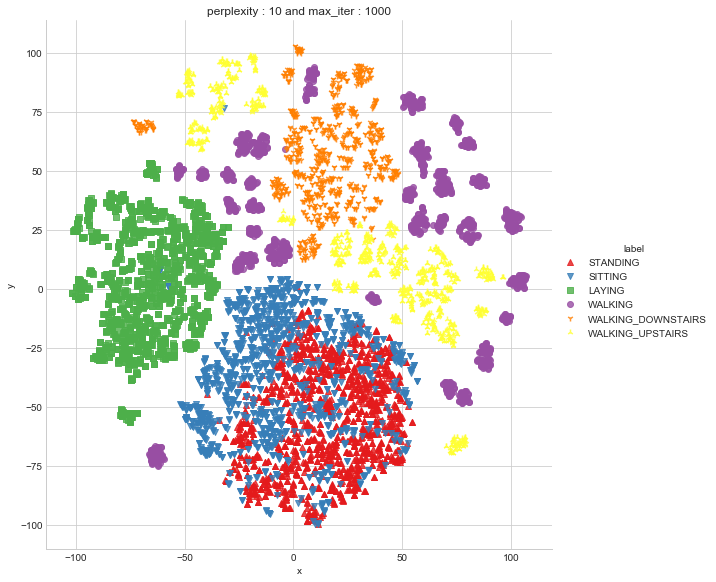

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.335s...
[t-SNE] Computed neighbors for 7352 samples in 47.348s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.308s
[t-SNE] Iteration 50: error = 97.6363754, gradient norm = 0.0179165 (50 iterations in 17.196s)
[t-SNE] Iteration 100: error = 84.1694107, gradient norm = 0.0072685 (50 iterati

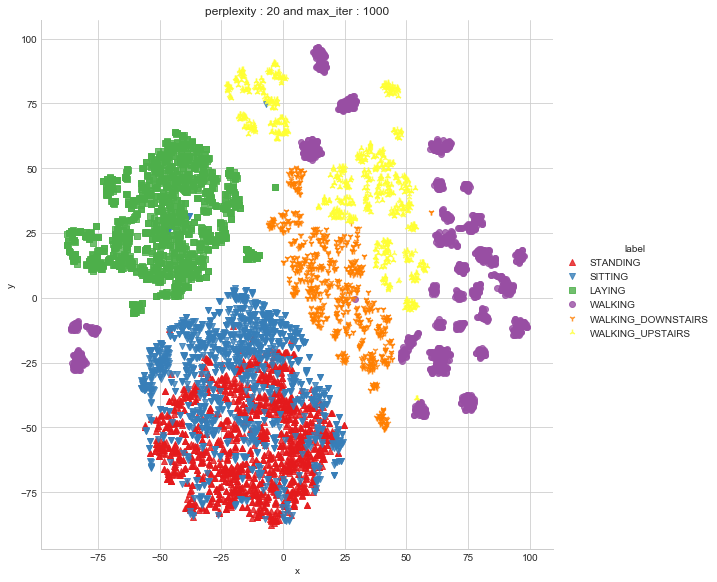

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.318s...
[t-SNE] Computed neighbors for 7352 samples in 48.185s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.601s
[t-SNE] Iteration 50: error = 86.7005539, gradient norm = 0.0173089 (50 iterations in 24.908s)
[t-SNE] Iteration 100: error = 75.6664429, gradient norm = 0.0046247 (50 iterat

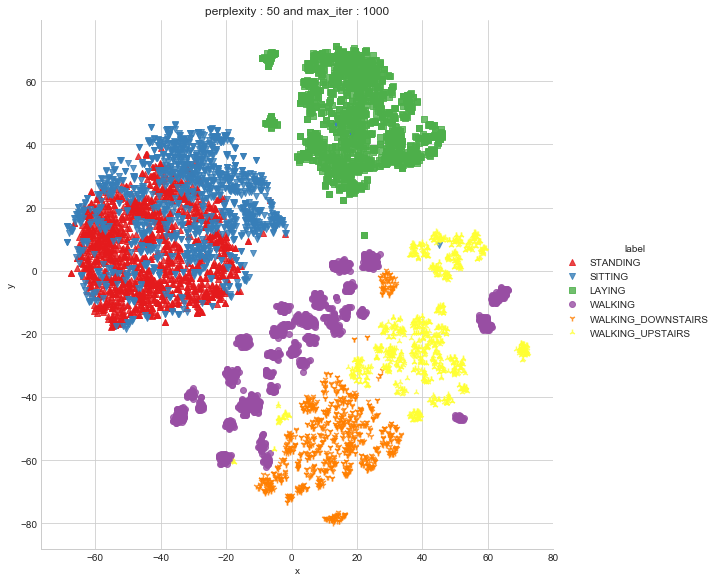

Done


In [29]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

>From t-SNE plot it is evident that data related to standing and sitting are overlapping for obvious reasons
But most of the other classes can be classified by simple Machine Learning Models